In [11]:
# run the command if qiskit is not installed in this jupyter notebook "pip install qiskit"

In [12]:
from qiskit import * 

In [13]:
circuit = QuantumCircuit(2,2)

In [14]:
quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)

In [15]:
#pip install matplotlib

In [16]:
#%matplotlib inline

In [17]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

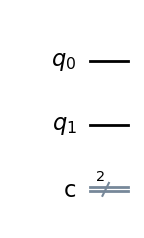

In [18]:
circuit.draw(output='mpl')

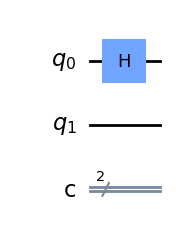

In [19]:
circuit.h(0)
circuit.draw(output='mpl')

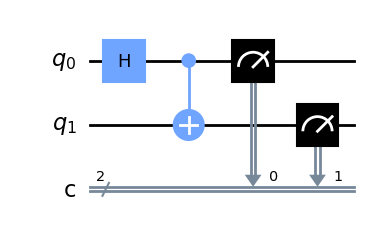

In [20]:
circuit.cx(0,1) # 0-> control qubit, 1-> target qubit
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [21]:
simulator = Aer.get_backend('qasm_simulator')

In [22]:
result = execute(circuit, backend=simulator).result()

In [23]:
from qiskit.visualization import plot_histogram

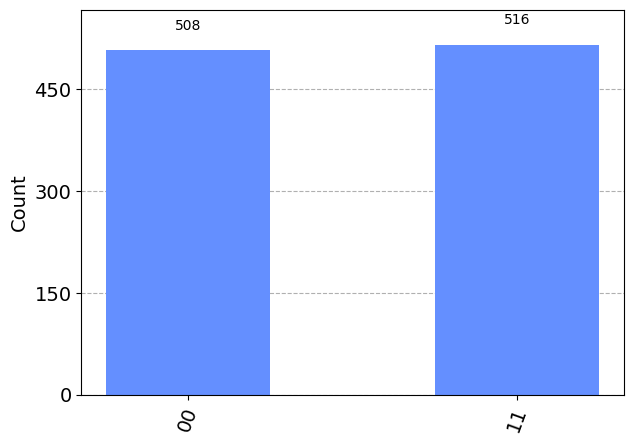

In [24]:
plot_histogram(result.get_counts(circuit))

In [25]:
IBMQ.load_account()

C:\TEMP\ipykernel_59932\485379158.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\TEMP\ipykernel_59932\485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
provider = IBMQ.get_provider(hub = "ibm-q")

In [27]:
quantum_computer = provider.get_backend('ibmq_qasm_simulator')

In [28]:

job = execute(circuit, backend=quantum_computer)

In [29]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


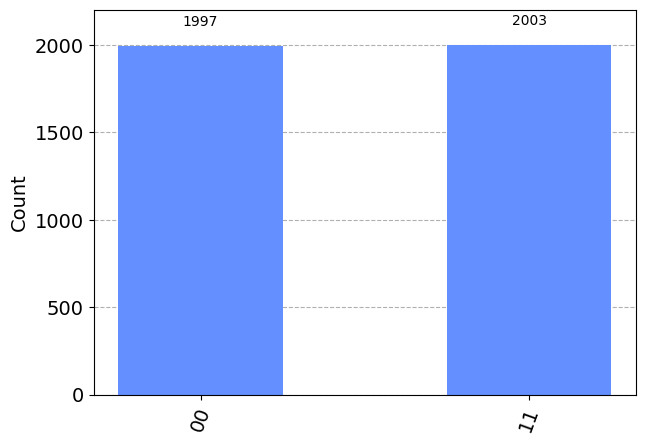

In [30]:
quantum_result = job.result()
plot_histogram(quantum_result.get_counts(circuit))

In [31]:
#Toffoli
#Also called CCX, and is a three qubits gate where the first two qubits are used as control and the thrid qubit is the target. 


In [37]:
 #Phase and Bloch Sphere
from qiskit import * 
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline
import math

Aer.backends()



[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [39]:
qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')

In [44]:
def run_on_simulators(circuit):
    statevec_job = execute(circuit, backend=statevector_simulator)
    result = statevec_job.result()
    statevec = result.get_statevector()

    num_qubits = circuit.num_qubits

    circuit.measure([i for i in range(num_qubits)], [i for i in range[num_qubits]])

    qasm_job = execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()

    return statevec, counts



In [45]:
circuit = QuantumCircuit(2,2)
statevec, counts = run_on_simulators(circuit)

TypeError: 'type' object is not subscriptable

In [ ]:
plot_bloch_multivector(statevec)